In [160]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [161]:
df_final= pd.read_pickle(r"C:\Users\lukas\Desktop\4.9_final.pkl")
# importing the final data set

In [162]:
df_final.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_order,product_id,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Low Spender,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Low Spender,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Low Spender,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Low Spender,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Low Spender,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423


Step 2: No PIP data to address in the dataset as it is.

In [164]:
#Step 3: Define a function to map states to regions
def assigned_region(state):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 
                 'New Jersey', 'New York', 'Pennsylvania']
    midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 
               'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 
             'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
             'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 
            'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

In [165]:
# Apply the function to create a new "region" column
df_final['region'] = df_final['state'].apply(assigned_region)

In [166]:
df_final.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_order,product_id,...,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,20.50,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [167]:
# creating a crosstab between the region and spending_flag columns
crosstab = pd.crosstab(df_final['region'], df_final['spending_flag'], dropna = False)

In [168]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


Across all regions, the vast majority of customers are low spenders, with a smaller percentage being high spenders. Therefore, we can't talk about a significant difference across states in terms of spending habits.

In [170]:
# Step 4: Exclude low activity customers
df_grouped = df_final.groupby('user_id')['order_number'].sum().reset_index()
df_grouped.rename(columns={'order_number': 'total_orders'}, inplace=True)

In [171]:
def activity_level(row):
    if row ['total_orders'] < 5:
        return 'low activity'
    elif row ['total_orders'] < 10:
        return 'medium activity'
    else:
        return 'high activity'

In [172]:
df_grouped['activity_level'] = df_grouped.apply(activity_level, axis=1)

In [173]:
df_grouped.head()

,user_id,total_orders,activity_level
0,1,343,high activity
1,2,1567,high activity
2,3,528,high activity
3,4,52,high activity
4,5,92,high activity


In [174]:
df_merged = df_final.merge(df_grouped[['user_id', 'activity_level']], on='user_id', how='left')

In [175]:
df_filtered_2 = df_merged[df_merged['activity_level'] != 'low activity']
# dropping the low activity users from the main dataframe

In [176]:
df_filtered_2.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_order,product_id,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_level
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Non-Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity


In [177]:
df_filtered_2 = df_final

In [178]:
#Step 5: Creating a profiling variable. 

Checked the departments.csv to remember which department id refers to which category.

In [180]:
def create_customer_profile(row):
    age = row['age']
    income = row['income']
    dependents = row['n_dependants']
    department_id = row['department_id']
    order_day = row['order_dow']
    order_hour = row['order_hour_of_day']

    # Initialize profile variable
    profile = 'Other'  # Default profile

    if age < 40 and dependents == 0 and department_id in [4, 6]: # Fast food or Alcohol
        profile = 'Single Adult'

    elif 25 <= age < 42 and dependents >= 1 and department_id in [8, 1]: # Baby products or Grocery
        profile = 'Young Parent'

    elif age >= 60 and department_id in [11, 3]: # Health products or Household essentials
        profile = 'Retired Individual'

    return profile

In [181]:
df_final['customer_profile'] = df_final.apply(create_customer_profile, axis=1)

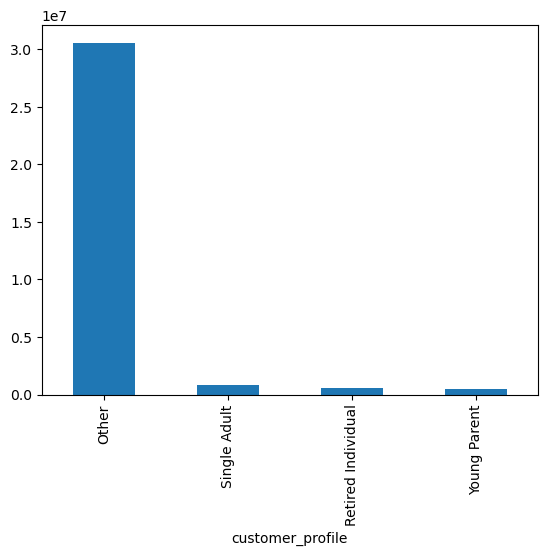

In [182]:
# Step 6. Visualize the distribution of customer profiles
bar1= df_final['customer_profile'].value_counts().plot.bar()

In [183]:
bar1.figure.savefig(os.path.join(r"C:\Users\lukas\Downloads\bar11.png"))

In [184]:
df_final['customer_profile'].value_counts()

customer_profile
Other                 30583489
Single Adult            840023
Retired Individual      553195
Young Parent            457505
Name: count, dtype: int64

#Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [186]:
df_final['total_price'] = df_final.groupby('user_id')['prices'].transform('sum')
#expenditure

In [187]:
expenditure_frequency_agg = df_final.groupby('customer_profile')['total_price'].agg(['max', 'mean', 'min'])
#aggregation of expenditure on a customer profile level 

In [188]:
expenditure_frequency_agg.columns = ['Max Expenditure', 'Mean Expenditure', 'Min Expenditure']

In [189]:
expenditure_frequency_agg

,Max Expenditure,Mean Expenditure,Min Expenditure
customer_profile,,,
Other,26651.10,3290.22,3.00
Retired Individual,26651.10,3250.30,12.30
Single Adult,18883.20,3324.37,11.60
Young Parent,22696.90,3106.58,4.20


In [190]:
usage_frequency_agg = df_final.groupby('customer_profile')['order_number'].agg(['max', 'mean', 'min'])
#aggregation of usage frequency on a customer profile level 

In [191]:
usage_frequency_agg.columns = ['Max Usage Frequency', 'Mean Usage Frequency', 'Min Usage Frequency']

In [192]:
usage_frequency_agg

,Max Usage Frequency,Mean Usage Frequency,Min Usage Frequency
customer_profile,,,
Other,99,17.15,1
Retired Individual,99,16.96,1
Single Adult,99,17.72,1
Young Parent,99,15.44,1


In [193]:
df_final.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_order,product_id,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_profile,total_price
0,0,2539329,1,prior,1,2,8,NaN,True,196,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Other,375.70
1,0,2539329,1,prior,1,2,8,NaN,True,14084,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Other,375.70
2,0,2539329,1,prior,1,2,8,NaN,True,12427,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Other,375.70
3,0,2539329,1,prior,1,2,8,NaN,True,26088,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Other,375.70
4,0,2539329,1,prior,1,2,8,NaN,True,26405,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Other,375.70


Step 8: Compare customer profiles with departments and regions

In [195]:
crosstab_region = pd.crosstab(df_final['customer_profile'], df_final['region'], margins=True)

In [196]:
crosstab_region

region,Midwest,Northeast,South,West,All
customer_profile,,,,,
Other,7173993,5399741,10177578,7832177,30583489
Retired Individual,128856,99939,184113,140287,553195
Single Adult,194096,148073,286202,211652,840023
Young Parent,106865,80594,153717,116329,457505
All,7603810,5728347,10801610,8300445,32434212


In [197]:
crosstab_departments = pd.crosstab(df_final['department_id'], df_final['customer_profile'], margins=True)

In [198]:
crosstab_departments

customer_profile,Other,Retired Individual,Single Adult,Young Parent,All
department_id,,,,,
1,1797134,0,0,439298,2236432
2,36291,0,0,0,36291
3,775512,401275,0,0,1176787
4,8662828,0,816463,0,9479291
5,153743,0,0,0,153743
6,245693,0,23560,0,269253
7,2688159,0,0,0,2688159
8,79517,0,0,18207,97724
9,866627,0,0,0,866627


No significant relationship is observed across customer profiles in terms of departments or regions.

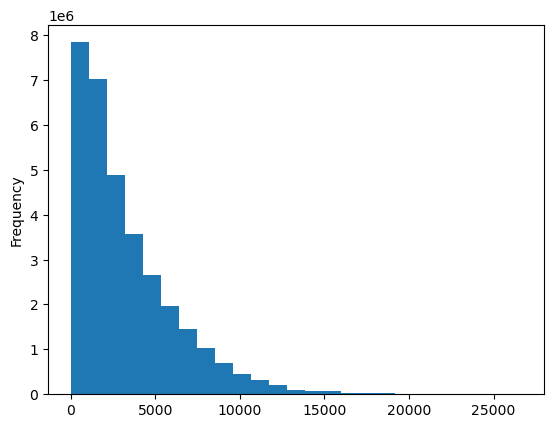

In [200]:
hist1= df_final['total_price'].plot.hist(bins=25)

In [201]:
hist1.figure.savefig(os.path.join(r"C:\Users\lukas\Downloads\hist101.png"))

In [ ]:
df_final.to_csv('df_final_10.csv', index=False)